In [1]:
# basic tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
"""
    First look into out test and train datasets
"""

# Load train, test datasets
original_train_ds = pd.read_csv('train.csv')
original_test_ds = pd.read_csv('test.csv')

# use for analysis
train_df = original_train_ds.copy()
test_df = original_test_ds.copy()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [15]:
"""
    Lets focus only on columns with numerical features
"""

object_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']
numerical_features = [feature for feature in train_df.columns if feature not in object_features]

# remove id column from numerical_features
numerical_features = numerical_features[1:]
numerical_features

['Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Listening_Time_minutes']

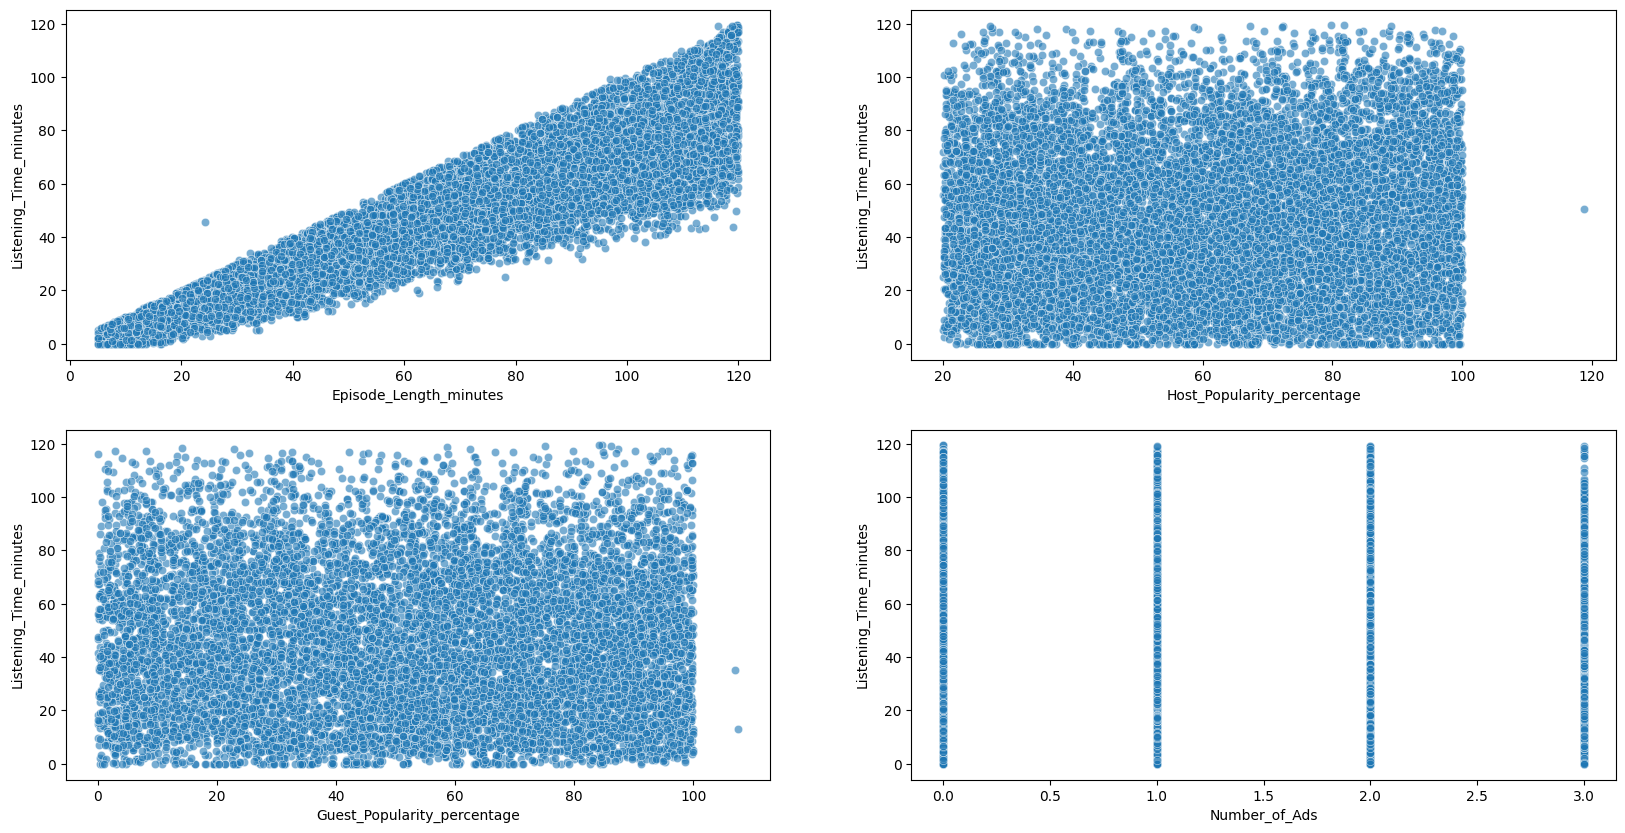

In [25]:
"""
    Draw 4 plots for a sample of 15 000 rows to see how our data in each of the cols look like when compared to Listening_Time_minutes
"""

# take a random sample from our train dataset
sample_df = train_df.sample(n=15000, random_state=20)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for var, subplot in zip(numerical_features, ax.flatten()):
    sns.scatterplot(
        x=var, 
        y='Listening_Time_minutes', 
        data=sample_df, 
        ax=subplot,
        alpha=0.6
    )